## CLASSIFICATION MODELS

### STEP 1: IMPORTING LIBARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### STEP 2: IMPORTING DATASET

In [2]:
eda=pd.read_excel('Titanic.xlsx')

In [3]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
eda.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
eda.shape

(891, 12)

In [6]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### STEP 3:DATA CLEANING AND PREPARATION OF EDA

#### EDA STEPS

#### STEP 1: VARIABLE IDENTIFICATION

In [7]:
eda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### STEP 2: UNIVARIATE ANALYSIS

###### CATAGORICAL VARIABLES

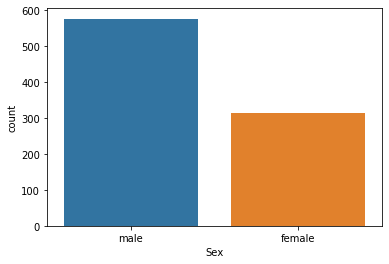

In [8]:
sns.countplot(x='Sex',data=eda)

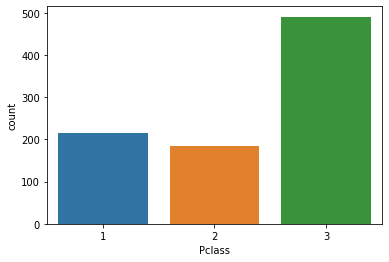

In [9]:
sns.countplot(x='Pclass',data=eda)

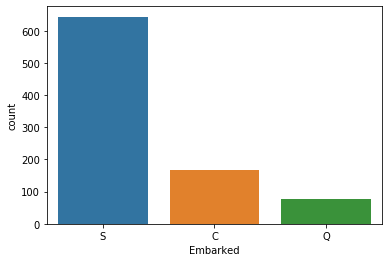

In [10]:
sns.countplot(x='Embarked',data=eda)

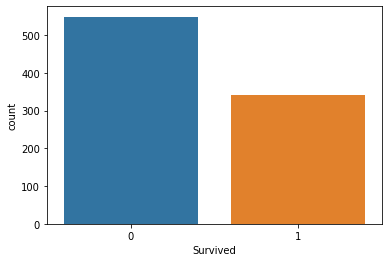

In [11]:
sns.countplot(x='Survived',data=eda)

###### CONTINUOUS VARIABLES

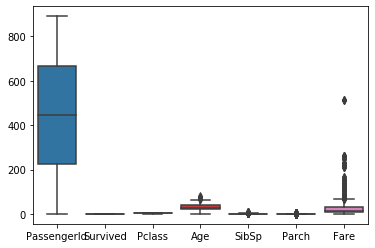

In [12]:
sns.boxplot(data=eda)

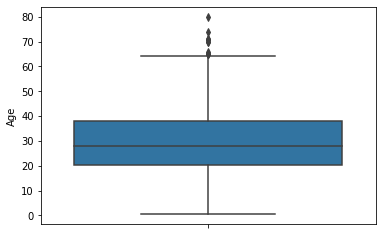

In [13]:
sns.boxplot(y='Age',data=eda)

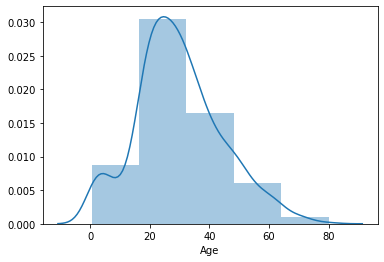

In [14]:
sns.distplot(eda['Age'],bins=5)

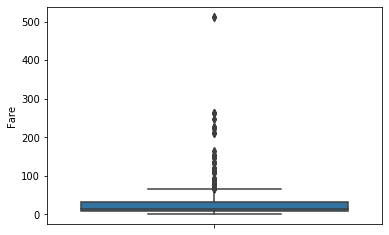

In [15]:
sns.boxplot(y='Fare',data=eda)

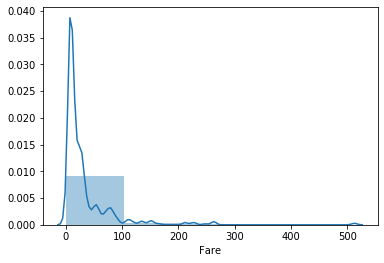

In [16]:
sns.distplot(eda['Fare'],bins=5)

#### STEP 3: BIVARIATE ANALYSIS

###### CONTINUOUS AND CONTINUOUS

Text(0, 0.5, 'Fare')

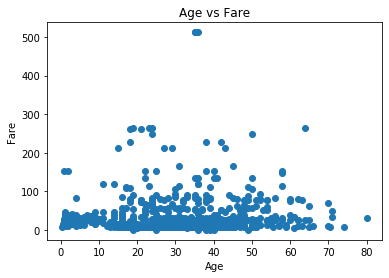

In [17]:
plt.scatter(eda['Age'],eda['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

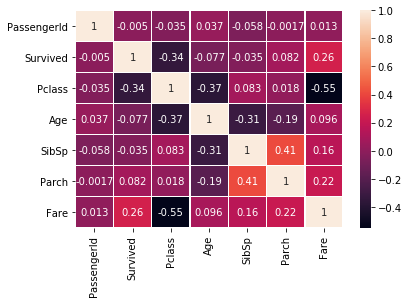

In [18]:
sns.heatmap(eda.corr(),annot=True,linewidth=0.5)

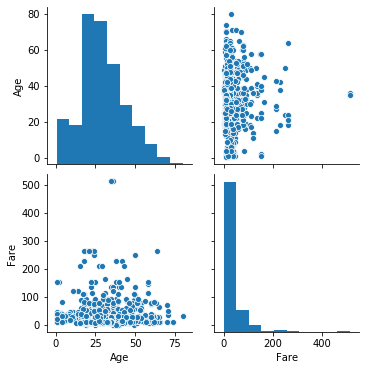

In [19]:
cont=eda.iloc[:,[5,9]]
sns.pairplot(cont)

###### CATEGORIAL AND CATEGORICAL

In [20]:
counts=eda.groupby(['Sex','Pclass'],axis=0)
counts.size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

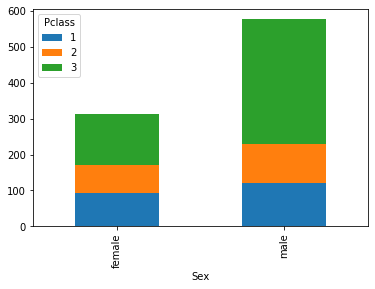

In [21]:
pd.crosstab(eda['Sex'],eda['Pclass']).plot(kind='bar',stacked=True)

In [22]:
counts1=eda.groupby(['Sex','Embarked'],axis=0)
counts1.size()

Sex     Embarked
female  C            73
        Q            36
        S           203
male    C            95
        Q            41
        S           441
dtype: int64

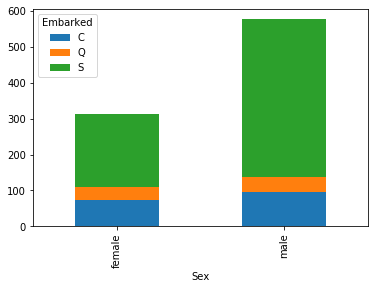

In [23]:
pd.crosstab(eda['Sex'],eda['Embarked']).plot(kind='bar',stacked=True)

In [24]:
counts2=eda.groupby(['Pclass','Embarked'],axis=0)
counts2.size()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
dtype: int64

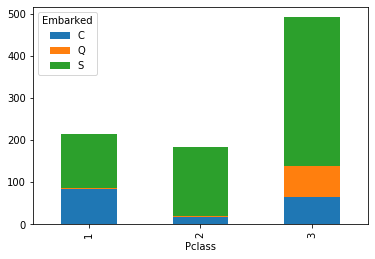

In [25]:
pd.crosstab(eda['Pclass'],eda['Embarked']).plot(kind='bar',stacked=True)

In [26]:
counts3=eda.groupby(['Pclass','Survived'],axis=0)
counts3.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

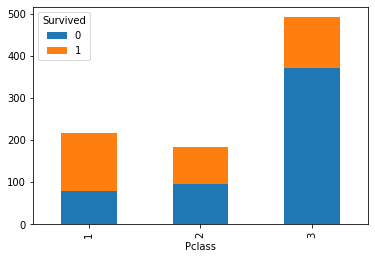

In [27]:
pd.crosstab(eda['Pclass'],eda['Survived']).plot(kind='bar',stacked=True)

In [28]:
counts4=eda.groupby(['Sex','Survived'],axis=0)
counts4.size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

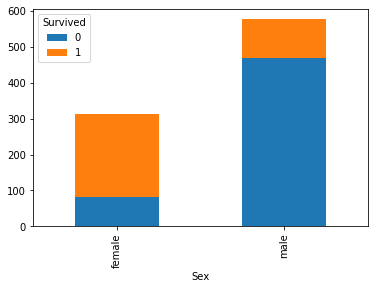

In [29]:
pd.crosstab(eda['Sex'],eda['Survived']).plot(kind='bar',stacked=True)

In [30]:
counts5=eda.groupby(['Embarked','Survived'],axis=0)
counts5.size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

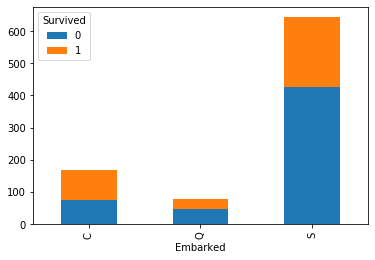

In [31]:
pd.crosstab(eda['Embarked'],eda['Survived']).plot(kind='bar',stacked=True)

###### CONTINUOUS AND CATAGORICAL

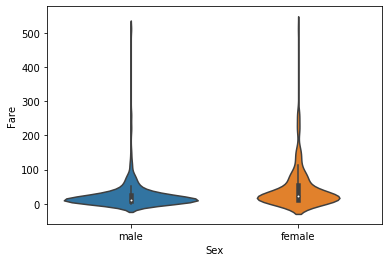

In [32]:
sns.violinplot(x='Sex',y='Fare',data=eda)

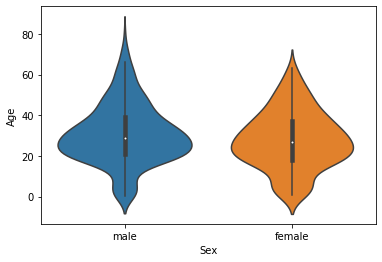

In [33]:
sns.violinplot(x='Sex',y='Age',data=eda)

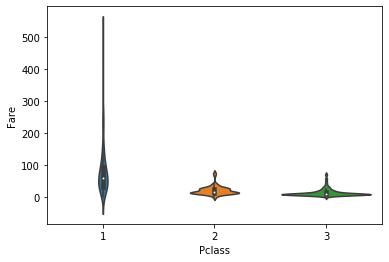

In [34]:
sns.violinplot(x='Pclass',y='Fare',data=eda)

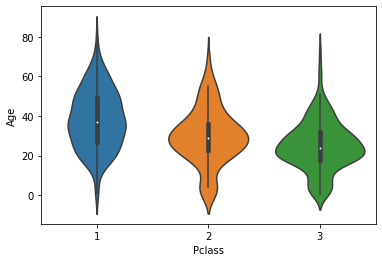

In [35]:
sns.violinplot(x='Pclass',y='Age',data=eda)

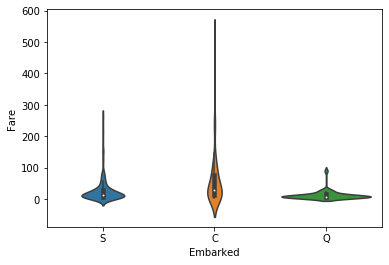

In [36]:
sns.violinplot(x='Embarked',y='Fare',data=eda)

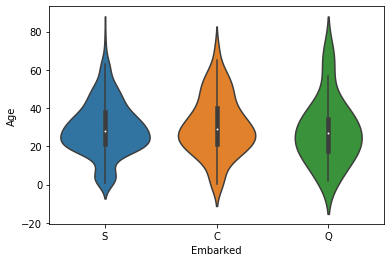

In [37]:
sns.violinplot(x='Embarked',y='Age',data=eda)

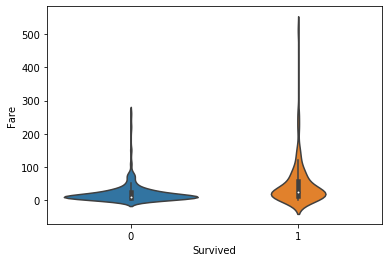

In [38]:
sns.violinplot(x='Survived',y='Fare',data=eda)

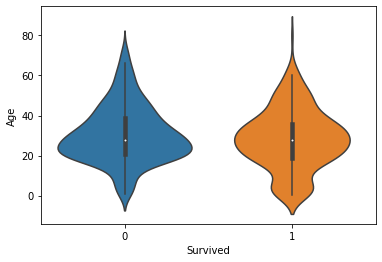

In [39]:
sns.violinplot(x='Survived',y='Age',data=eda)

#### STEP 4: MISSING VALUE TREATMENT

In [40]:
eda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
eda.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
eda.isnull().values.any()

True

In [43]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C5E04B0>]],
      dtype=object)

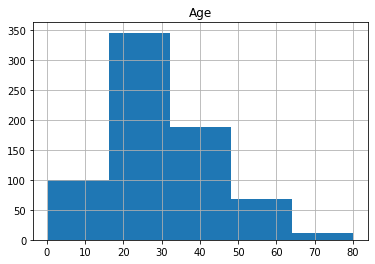

In [45]:
eda.hist(column=['Age'],bins=5)

In [46]:
eda['Age']=eda['Age'].fillna(value=eda['Age'].median())
eda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
eda['Embarked']=eda['Embarked'].fillna('S')
eda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


#### STEP 5: OUTLIER TREATMENT

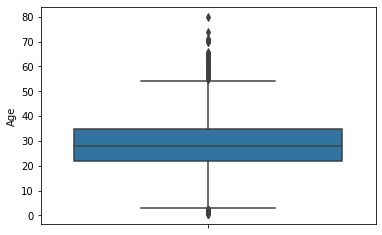

In [49]:
sns.boxplot(y='Age',data=eda)

In [50]:
eda['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
IQR = eda['Age'].quantile(0.75)-eda['Age'].quantile(0.25)
print(IQR)

13.0


In [52]:
Upper_OutlierLimit = eda['Age'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = eda['Age'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

54.5
2.5


In [53]:
OutlierValues = eda[(eda['Age']>=Upper_OutlierLimit)|(eda['Age']>=Lower_OutlierLimit)]
OutlierValues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
for i in range(0,891):
    if((eda['Age'][i]>=Upper_OutlierLimit)|(eda['Age'][i]<=Lower_OutlierLimit)):
        eda['Age'][i]=eda['Age'].quantile(0.85)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


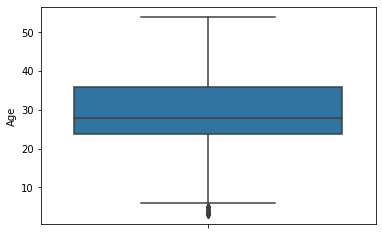

In [55]:
sns.boxplot(y='Age',data=eda)

In [56]:
for i in range(0,891):
    if(eda['Age'][i]<=10):
        eda['Age'][i]=eda['Age'].quantile(0.95)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


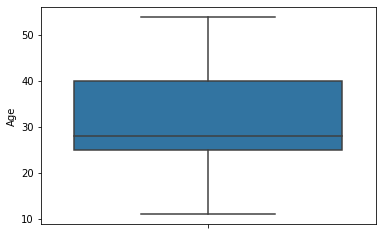

In [57]:
sns.boxplot(y='Age',data=eda)

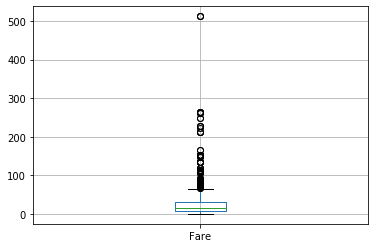

In [58]:
eda.boxplot(column = ['Fare'])

In [59]:
eda['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [60]:
IQR = eda['Fare'].quantile(0.75)-eda['Fare'].quantile(0.25)
print(IQR)

23.0896


In [61]:
Upper_OutlierLimit = eda['Fare'].quantile(0.75) + 1.5*IQR
Upper_OutlierLimit

65.6344

In [62]:
eda[eda['Fare']>Upper_OutlierLimit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S


In [63]:
for i in range(0,891):
    if((eda['Fare'][i]>=Upper_OutlierLimit)):
        eda['Fare'][i]=eda['Fare'].quantile(0.85)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


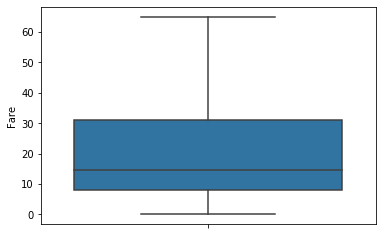

In [64]:
sns.boxplot(y='Fare',data=eda)

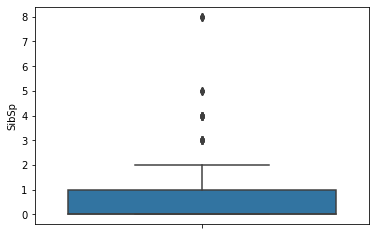

In [65]:
sns.boxplot(y='SibSp',data=eda)

In [66]:
eda['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [67]:
IQR = eda['SibSp'].quantile(0.75)-eda['SibSp'].quantile(0.25)
print(IQR)

1.0


In [68]:
Upper_OutlierLimit = eda['SibSp'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = eda['SibSp'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

2.5
-1.5


In [69]:
Upper_OutlierLimit = eda['SibSp'].quantile(0.75) + 1.5*IQR
Upper_OutlierLimit

2.5

In [70]:
OutlierValues = eda[(eda['SibSp']>=Upper_OutlierLimit)|(eda['SibSp']>=Lower_OutlierLimit)]
OutlierValues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,56.4958,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
for i in range(0,891):
    if((eda['SibSp'][i]>=Upper_OutlierLimit)|(eda['SibSp'][i]<=Lower_OutlierLimit)):
        eda['SibSp'][i]=eda['SibSp'].quantile(0.90)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


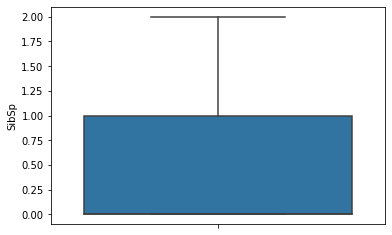

In [72]:
sns.boxplot(y='SibSp',data=eda)

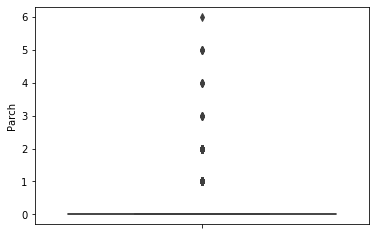

In [73]:
sns.boxplot(y='Parch',data=eda)

In [74]:
eda['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [75]:
IQR = eda['Parch'].quantile(0.75)-eda['Parch'].quantile(0.25)
print(IQR)

0.0


In [76]:
Upper_OutlierLimit = eda['Parch'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = eda['Parch'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

0.0
0.0


In [77]:
OutlierValues = eda[(eda['Parch']>=Upper_OutlierLimit)|(eda['Parch']>=Lower_OutlierLimit)]
OutlierValues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,56.4958,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
for i in range(0,891):
    if((eda['Parch'][i]>=Upper_OutlierLimit)|(eda['Parch'][i]<=Lower_OutlierLimit)):
        eda['Parch'][i]=eda['Parch'].quantile(0.95)

C:\Users\91897\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


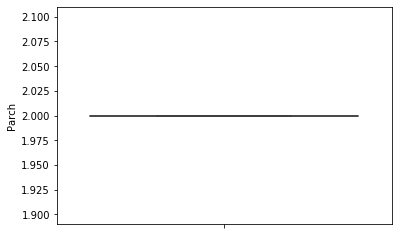

In [79]:
sns.boxplot(y='Parch',data=eda)

#### STEP 6: VARIABLE CREATION

In [80]:
obj=eda.dtypes == np.object
print(obj)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [81]:
eda.columns[obj]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [82]:
col=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']
eda=eda[col]

In [83]:
del eda['Ticket']

In [84]:
del eda ['Cabin']

In [85]:
del eda['Name']

In [86]:
obj = eda.dtypes == np.object
print(obj)

PassengerId    False
Pclass         False
Sex             True
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
Survived       False
dtype: bool


In [87]:
dummydf = pd.DataFrame()
for i in eda.columns[obj]:
 dummy=pd.get_dummies(eda[i], drop_first=True)
 #"drop_first" drops the first category in order to avoid multicollinearity problem
 #prefix is used to add a certain prefix to all the dummy variables created for any particular categorial variable

 dummydf=pd.concat([dummydf, dummy], axis=1) # Concatenating Columns
 #"pd.concat" combines all the dummy columns for all the categorical variables

print(dummydf)

     male  Q  S
0       1  0  1
1       0  0  0
2       0  0  1
3       0  0  1
4       1  0  1
..    ... .. ..
886     1  0  1
887     0  0  1
888     0  0  1
889     1  0  0
890     1  1  0

[891 rows x 3 columns]


In [88]:
eda1=pd.concat([eda,dummydf], axis=1)

In [89]:
eda1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,male,Q,S
0,1,3,male,22.0,1,2,7.2500,S,0,1,0,1
1,2,1,female,38.0,1,2,56.4958,C,1,0,0,0
2,3,3,female,26.0,0,2,7.9250,S,1,0,0,1
3,4,1,female,35.0,1,2,53.1000,S,1,0,0,1
4,5,3,male,35.0,0,2,8.0500,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,2,13.0000,S,0,1,0,1
887,888,1,female,19.0,0,2,30.0000,S,1,0,0,1
888,889,3,female,28.0,1,2,23.4500,S,0,0,0,1
889,890,1,male,26.0,0,2,30.0000,C,1,1,0,0


In [90]:
eda1.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [91]:
ship = pd.get_dummies(eda, drop_first=True)
ship

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,2,7.2500,0,1,0,1
1,2,1,38.0,1,2,56.4958,1,0,0,0
2,3,3,26.0,0,2,7.9250,1,0,0,1
3,4,1,35.0,1,2,53.1000,1,0,0,1
4,5,3,35.0,0,2,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,2,13.0000,0,1,0,1
887,888,1,19.0,0,2,30.0000,1,0,0,1
888,889,3,28.0,1,2,23.4500,0,0,0,1
889,890,1,26.0,0,2,30.0000,1,1,0,0


In [92]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


### STEP 4: DEFINING X AND Y

In [93]:
cols=['PassengerId','Pclass','Age','SibSp','Parch','Fare',
     'Sex_male','Embarked_Q','Embarked_S','Survived']
ship=ship[cols]
ship

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,3,22.0,1,2,7.2500,1,0,1,0
1,2,1,38.0,1,2,56.4958,0,0,0,1
2,3,3,26.0,0,2,7.9250,0,0,1,1
3,4,1,35.0,1,2,53.1000,0,0,1,1
4,5,3,35.0,0,2,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,2,13.0000,1,0,1,0
887,888,1,19.0,0,2,30.0000,0,0,1,1
888,889,3,28.0,1,2,23.4500,0,0,1,0
889,890,1,26.0,0,2,30.0000,1,0,0,1


In [94]:
X=ship.iloc[:,:-1].values
X

array([[  1.,   3.,  22., ...,   1.,   0.,   1.],
       [  2.,   1.,  38., ...,   0.,   0.,   0.],
       [  3.,   3.,  26., ...,   0.,   0.,   1.],
       ...,
       [889.,   3.,  28., ...,   0.,   0.,   1.],
       [890.,   1.,  26., ...,   1.,   0.,   0.],
       [891.,   3.,  32., ...,   1.,   1.,   0.]])

In [95]:
X.shape

(891, 9)

In [96]:
y=ship.iloc[:,-1].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [97]:
y.shape

(891,)

### STEP 5: SPLIT THE DATA INTO TRAIN AND TEST

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [100]:
X_train.shape

(861, 9)

In [101]:
X_test.shape

(30, 9)

In [102]:
y_train.shape

(861,)

In [103]:
y_test.shape

(30,)

In [104]:
X_test

array([[496.    ,   3.    ,  28.    ,   0.    ,   2.    ,  14.4583,
          1.    ,   0.    ,   0.    ],
       [649.    ,   3.    ,  28.    ,   0.    ,   2.    ,   7.55  ,
          1.    ,   0.    ,   1.    ],
       [279.    ,   3.    ,  48.    ,   1.    ,   2.    ,  29.125 ,
          1.    ,   1.    ,   0.    ],
       [ 32.    ,   1.    ,  28.    ,   1.    ,   2.    ,  56.4958,
          0.    ,   0.    ,   0.    ],
       [256.    ,   3.    ,  29.    ,   0.    ,   2.    ,  15.2458,
          0.    ,   0.    ,   0.    ],
       [299.    ,   1.    ,  28.    ,   0.    ,   2.    ,  30.5   ,
          1.    ,   0.    ,   1.    ],
       [610.    ,   1.    ,  40.    ,   0.    ,   2.    ,  56.4958,
          0.    ,   0.    ,   1.    ],
       [319.    ,   1.    ,  31.    ,   0.    ,   2.    ,  56.4958,
          0.    ,   0.    ,   1.    ],
       [485.    ,   1.    ,  25.    ,   1.    ,   2.    ,  56.4958,
          1.    ,   0.    ,   0.    ],
       [368.    ,   3.    ,  28.    ,

### STEP 6: BUILD THE MODEL

#### LINEAR REGRESSION

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model=LinearRegression()

In [107]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
print(model.intercept_)
print(model.coef_)

1.0942930030012237
[ 9.66059901e-06 -1.47639030e-01  3.61175708e-05 -1.09561318e-03
  5.55111512e-17  2.53434291e-04 -5.08308694e-01 -6.82337488e-03
 -7.10394955e-02]


In [109]:
y_pred=model.predict(X_test)
y_pred

array([0.1525344 , 0.08122217, 0.14695846, 0.96119676, 0.65876025,
       0.37893534, 0.89727012, 0.89413383, 0.45715597, 0.65777443,
       0.08067241, 0.73606702, 0.14112239, 0.74153982, 0.96484321,
       0.5829775 , 0.07858723, 0.22998153, 0.08127325, 0.1545097 ,
       0.22463215, 0.8975764 , 0.14674169, 0.37879156, 0.58821295,
       0.96441243, 0.08020806, 0.58446693, 0.74397867, 0.59404032])

In [110]:
from sklearn.metrics import mean_squared_error,r2_score
Rsquared=r2_score(y_test,y_pred)
print(Rsquared)
MSE=mean_squared_error(y_test,y_pred)
print(MSE)

0.5408051111405845
0.11479872221485388


In [111]:
from math import sqrt
rmse=sqrt(MSE)
rmse

0.338819601284893

#### LOGISTIC REGRESSION

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr=LogisticRegression()

In [114]:
lr.fit(X_train,y_train)

C:\Users\91897\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [116]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[12  3]
 [ 3 12]]


In [117]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]
print(confusion)
print("TN :",TN)
print("FP :",FP)
print("FN :",FN)
print("TP :",TP)

[[12  3]
 [ 3 12]]
TN : 12
FP : 3
FN : 3
TP : 12


In [118]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ",round(accuracy,2)*100)
recall=recall_score(y_test,y_pred)
print("Recall : ",round(recall,2)*100)
precision=precision_score(y_test,y_pred)
print("Precision : ",round(precision,2)*100)
f1=f1_score(y_test,y_pred)
print("f1 score : ",round(f1,2)*100)
roc_auc=roc_auc_score(y_test,y_pred)
print("roc_auc : ",round(roc_auc,2)*100)

Accuracy :  80.0
Recall :  80.0
Precision :  80.0
f1 score :  80.0
roc_auc :  80.0


#### KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
y_pred = classifier.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,y_pred)

array([[11,  4],
       [ 9,  6]], dtype=int64)

In [122]:
accuracy_score(y_test,y_pred)

0.5666666666666667

In [123]:
error = []
accuracy = []
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

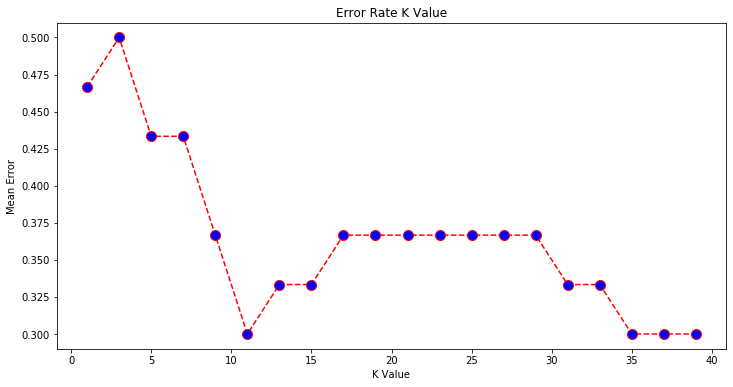

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

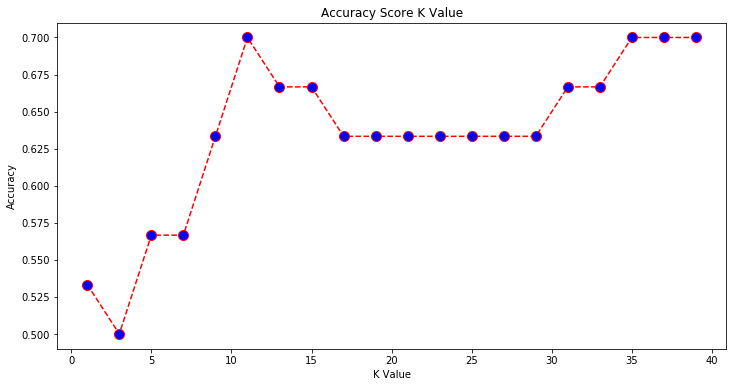

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [127]:
y_pred1 = classifier.predict(X_test)
y_pred1

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [128]:
confusion_matrix(y_test, y_pred1)

array([[14,  1],
       [ 8,  7]], dtype=int64)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [130]:
print("Accuracy : ",round(accuracy_score(y_test,y_pred1)*100,2),"%")

Accuracy :  70.0 %


#### DECISION TREE

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
clf=DecisionTreeClassifier()

In [133]:
clf=clf.fit(X_train,y_train)

In [134]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [135]:
from sklearn import metrics

In [136]:
print("Accuracy : ",round(metrics.accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy :  73.33 %


In [137]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  3],
       [ 5, 10]], dtype=int64)

C:\Users\91897\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


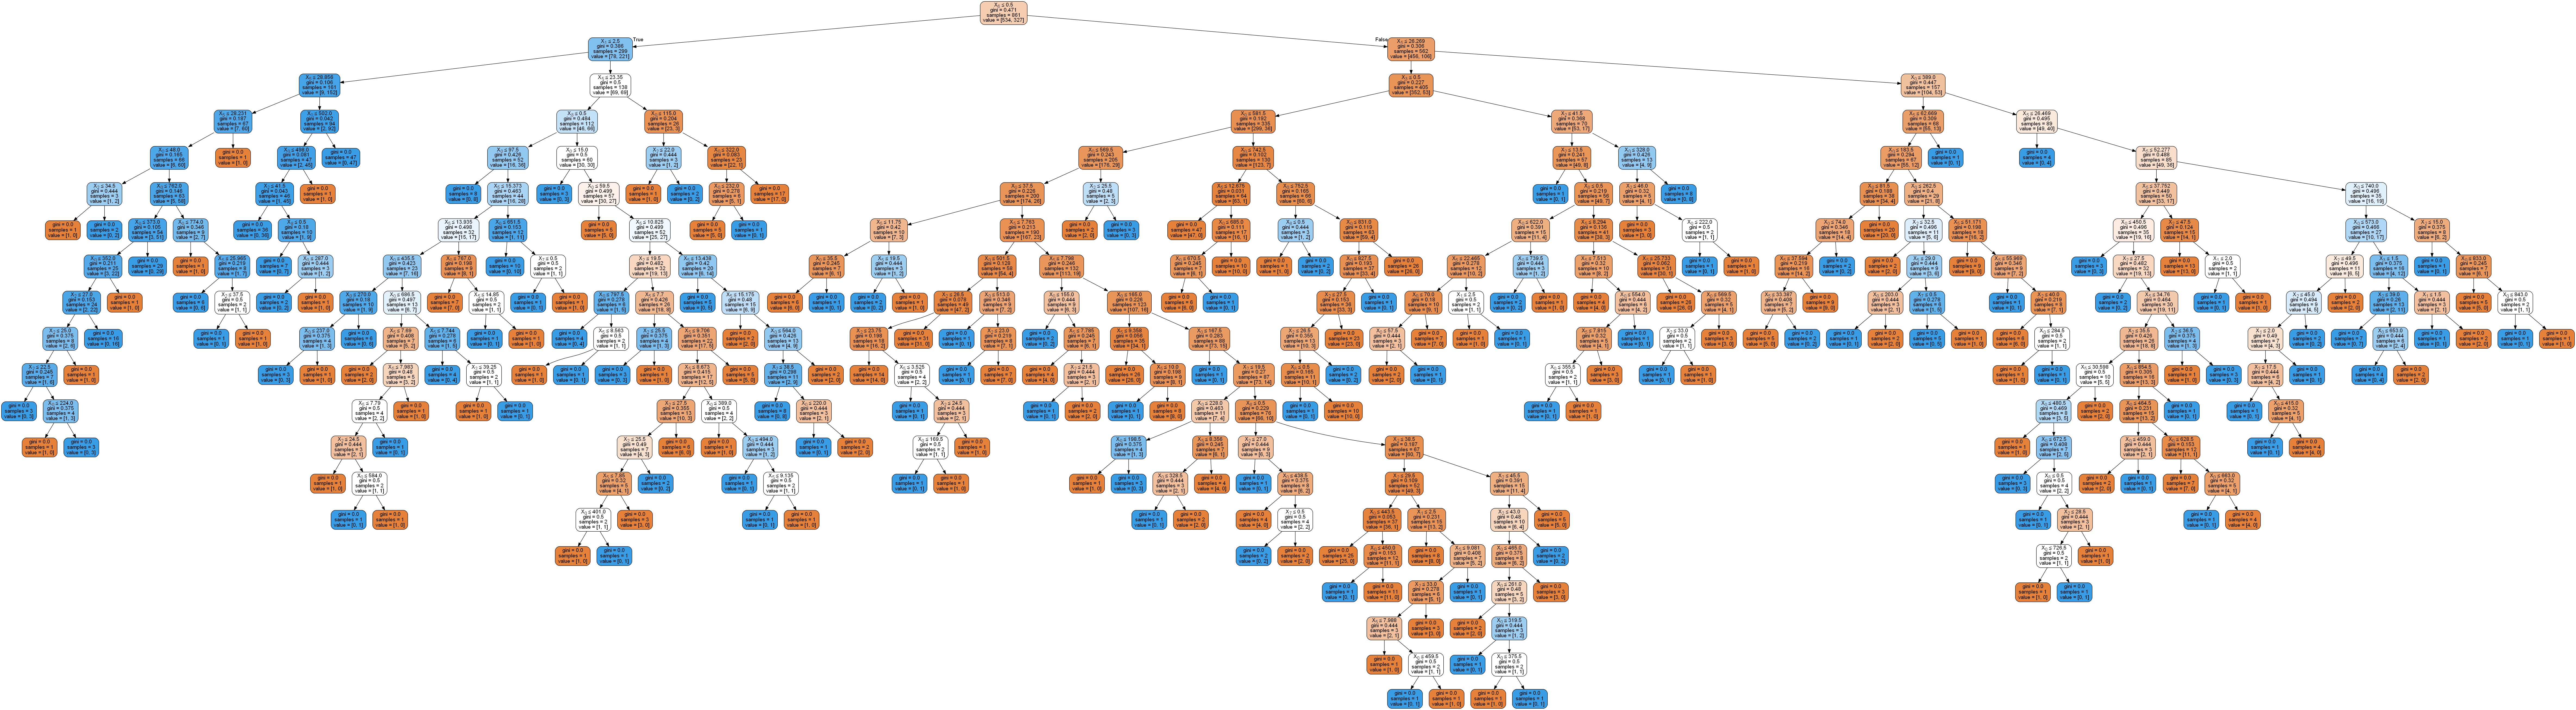

In [138]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
 filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)

#### RANDOM FOREST

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [140]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [141]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [142]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  1],
       [ 4, 11]], dtype=int64)

In [143]:
print("Accuracy : ",round(metrics.accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy :  83.33 %


In [144]:
pd.crosstab(y_test, y_pred, rownames = ['Actual Status'], colnames = [
'Predicted Status'])

Predicted Status,0,1
Actual Status,,
0,14,1
1,4,11


Accuracy in Logistic Regression : 80.0 % 
Accuracy in KNN : 70.0 % 
Accuracy in Decision Tree : 73.33 % 
Accuracy in Random Forest : 83.33 % 
Hence, the model with highest accuracy is Random Forest (83.33 %).